# Tarea semanal 2 - Respuesta en frecuencia de filtros pasivos RLC

![Imagen] (TS2 - consignas.png)

## Introduccion general de la tarea

En esta tarea vamos a incursionar un poco mas en el analisis de filtros pasivos de segundo orden construidos a partir de un circuito RLC. Para ello, vamos a analizar los circuitos poniendo la salida donde esta el elemento en derivacion, que en el caso del circuito a es una resistencia y en el b una resistencia en paralelo con un capacitor

En primera instancia podemos hacer un analisis conceptual para ver a grandes rasgos como funciona el filtro y luego calcular analiticamente la transferencia del circuito. De esta manera vamos a buscar comprobar la teorizado coincida con lo calculado analiticamente.

Como punto de partida, realizamos un analisis en los extremos del circuito al considerar el comportamiento de sus componentes en baja y alta frecuencia. De esta manera, podremos tener un panorama general del comportamiento del filtro y por ejemplo, si para baja frecuencia el Capacitor es un CA y el Inductor es un CC pensamos como se relaciona la Vi con la Vo teniendo asi una idea si dicho filtro deja pasar la se√±al de entrada o la corta. Esto mismo, lo hacemos en alta frecuencia en donde el Capacitor es una CC y el inductor un CA. 

Una vez hecho esto, pasamos a calcular la transferencia ( $ H(s) $ ) al pasar los componentes al dominio de Laplace teniendo la impedancia de cada uno de ellos. Con todo esto, obtenemos $ \frac{V_o}{V_i} $ y comenzamos en analisis requerido en los puntos 1, 2 y 3. 



## Comienzo de las resoluciones del circuito A

### 1) Calculamos la funcion transferencia

Vamos a pasar todos los componentes al dominio de Laplace, por lo cual las impedancias de los mismos nos quedan de la siguiente manera:

### $$ Z_L = sL  ;  Z_C = \frac{1}{sC}  ;  Z_R = R $$

Una vez tomamos todos los elementos en Laplace, procedemos a calcular la transferencia:

### $$ \frac{V_o}{V_i} = H(s) = \frac{Z_R }{ Z_R Z_L Z_C} = \frac{R}{ R + sL + \frac{1}{sC}} = \frac{R}{ \frac{1}{sC} (s R C + s^2 L C + 1)} $$

### $$ H(s) =  \frac{R}{ \frac{1}{sC} L C ( s^2 + s \frac{R}{L} + \frac{1}{L C} )} = \frac{s \frac{R}{L} }{s^2 + s \frac{R}{L} + \frac{1}{LC} } $$

Ahora, vamos a tomar:

### $$ \frac{w_0}{Q} = \frac{R}{L}  ;   w^2_0 = \frac{1}{L C} $$

Con lo que nos quedaria la transferencia como:

### $$ H(s) = \frac{s \frac{w_0}{Q} }{s^2 + s \frac{w_0}{Q} + w^2_0 } $$



Ya con la transferencia calculada vamos a pasar todo a jw, de manera que podamos calcular su modulo para as√≠ graficarlo 

### $$ H(jw) =  \frac{jw \frac{R}{L} }{-w^2 + jw \frac{R}{L} + \frac{1}{LC} } $$

### $$ |H(jw)| = \frac{jw \frac{R}{L} }{ \sqrt{ ( \frac{1}{LC}-w^2)^2 + (\frac{R}{L})^2 w^2  }  } $$

Con esto podemos observar que:

### $$ w \rightarrow 0 \Rightarrow |H(jw)| \rightarrow 0 $$
### $$ w \rightarrow  \infty \Rightarrow |H(jw)| \rightarrow 0 $$

Este ultimo viene de tomar el limite de w tendiendo a infinito:

### $$ \lim_{w \to \infty} |H(jw)| \simeq \frac{w}{\sqrt{2w^4}} \simeq \frac{1}{2w} \rightarrow 0 $$

Por otro lado, puedo ver que cuando $ w = w_0 = \frac{1}{\sqrt{LC}} $ vamos a tener un maximo en $|H(jw)|$, siendo $ H(jw_0) = \frac{1}{w_0} = \sqrt{LC} $

Con todo esto, podemos preveer que el comportamiento del circuito es el de un **Pasa Banda**, ya que, tanto para alta como baja frecuencia no deja pasar nada y vamos a tener una frecuencia $w_0$ en la cual tenemos el maximo de la transferencia que va a ser la banda de paso por la cual queremos que el filtro deje pasar nuestra se√±al, limpiando de esa manera tanto bajas como altas frecuencias.


### 2) Calculamos la respusta en modulo y fase para luego poder graficarla. 

De antes, ya tenemos que la respuesta en modulo es:

### $$ |H(jw)| = \frac{jw \frac{R}{L} }{ \sqrt{ ( \frac{1}{LC}-w^2)^2 + (\frac{R}{L})^2 w^2  }  } $$

Para ello, vamos a utilizar un codigo de python para graficar la respuesta en modulo del circuito:

 **Disclaimer** ; Este codigo lo gener√© a partir de chat GPT. No me gusta que no queda bien alineada la $w_c1$ al corte de los 3dB 


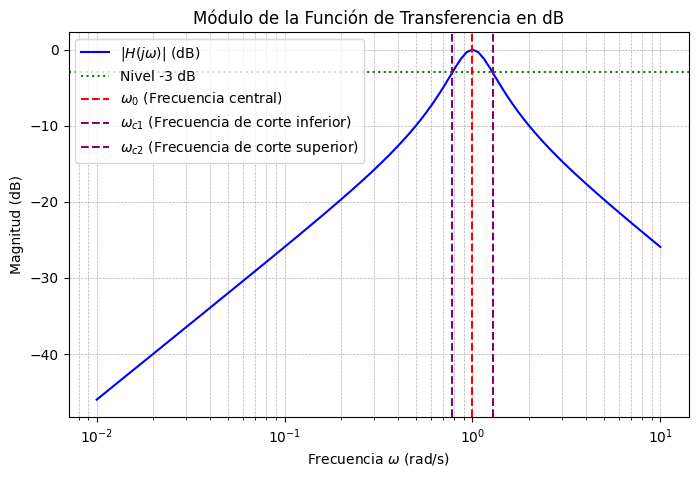

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, bode

# Par√°metros del sistema
w0 = 1  # Frecuencia central (rad/s)
Q = 2   # Factor de calidad

# Definir la funci√≥n de transferencia H(s) = (s * (w0/Q)) / (s^2 + (w0/Q) * s + w0^2)
num = [w0 / Q, 0]   # Numerador: s * (w0/Q)
den = [1, w0 / Q, w0**2]  # Denominador: s^2 + (w0/Q)s + w0^2

# Crear la funci√≥n de transferencia en SciPy
system = TransferFunction(num, den)

# Calcular la respuesta en frecuencia
w, mag, phase = bode(system)  # w en rad/s, mag en dB

# Calcular las frecuencias de corte (-3 dB) para un filtro pasa banda
w_c1 = w0 * (np.sqrt(1 + 1/(4*Q**2)) - 1/(2*Q))  # Frecuencia de corte inferior
w_c2 = w0 * (np.sqrt(1 + 1/(4*Q**2)) + 1/(2*Q))  # Frecuencia de corte superior

# Graficar el m√≥dulo en dB
plt.figure(figsize=(8, 5))
plt.semilogx(w, mag, label=r'$|H(j\omega)|$ (dB)', color='b')  # Escala log en eje x
plt.axhline(-3, color='green', linestyle="dotted", label='Nivel -3 dB')  # L√≠nea en -3 dB

# L√≠neas verticales en œâ0 y las frecuencias de corte con leyenda
plt.axvline(w0, color='red', linestyle="--", label=r'$\omega_0$ (Frecuencia central)')  # œâ0
plt.axvline(w_c1, color='purple', linestyle="dashed", label=r'$\omega_{c1}$ (Frecuencia de corte inferior)')  # œâc1
plt.axvline(w_c2, color='purple', linestyle="dashed", label=r'$\omega_{c2}$ (Frecuencia de corte superior)')  # œâc2

# Etiquetas en el eje X para œâ0 y las frecuencias de corte
plt.xlabel(r'Frecuencia $\omega$ (rad/s)')
plt.ylabel('Magnitud (dB)')
plt.title('M√≥dulo de la Funci√≥n de Transferencia en dB')

# Agregar leyenda
plt.legend(loc='best')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


Donde podemos ver el comportamiento del modulo en dB. Es importante recalcar, que tenemos zonas en las cuales tenemos un crecimiento y decrecimiento asindotico que obedecen una pendiente de $ \frac{\pm 20 dB}{Dec} $. Y cuando tenemos una frecuencia $w_0$, como antes se mencion√≥, es cuando tenemos la maxima transferencia; En otras palabras, cuando el filtro " Deja pasar todo " y a partir de all√≠ tenemos a ambos lados el ancho de banda de $ \pm 3 db $ en el cual consideramos a nuestro filtro activo 

Por otro lado, ahora calculamos la fase de este filtro mediante la formula:

### $$ \angle H(jw) = \arg(H(jw)) = \arg(\frac{P(jw)}{Q(jw)}) = \arg(P(jw)) - \arg(Q(jw)) $$

### $$ \angle H(jw) = \frac{\pi}{2} - \arctan( \frac{w \frac{w_0}{Q}}{w_0^2 - w^2}) $$

Ahora, si graficamos esto podemos obtener el diagrama de fase de este filtro tambien en una escala logaritmica. 

**Disclaimer**, Esta grafico fue hecho con chat GPT


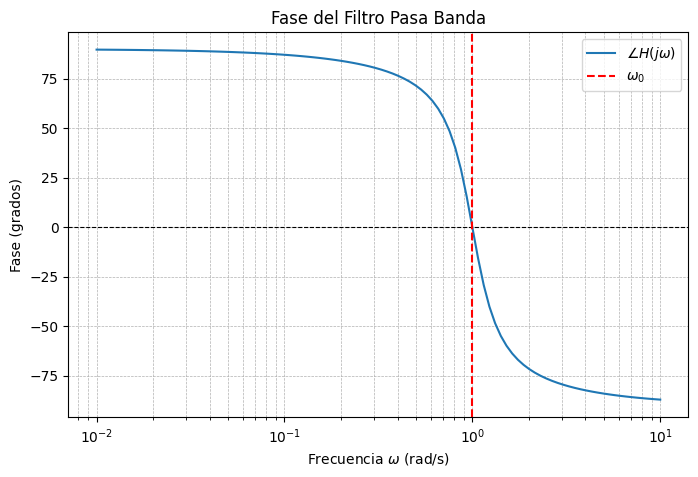

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, bode

# Par√°metros del sistema
w0 = 1  # Frecuencia natural (rad/s)
Q = 2   # Factor de calidad

# Definir la funci√≥n de transferencia H(s) = (s * (w0/Q)) / (s^2 + (w0/Q) * s + w0^2)
num = [w0 / Q, 0]   # Numerador: s * (w0/Q) ‚Üí coeficientes [a1, a0] de s
den = [1, w0 / Q, w0**2]  # Denominador: s^2 + (w0/Q)s + w0^2

# Crear la funci√≥n de transferencia en SciPy
system = TransferFunction(num, den)

# Calcular la respuesta en frecuencia
w, mag, phase = bode(system)  # w en rad/s, fase en grados

# Graficar la fase
plt.figure(figsize=(8, 5))
plt.semilogx(w, phase, label=r'$\angle H(j\omega)$')  # Eje x en escala log
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")  # L√≠nea en 0¬∞
plt.axvline(w0, color='red', linestyle="--", label=r'$\omega_0$')  # L√≠nea en œâ0

# Etiquetas y t√≠tulo
plt.xlabel(r'Frecuencia $\omega$ (rad/s)')
plt.ylabel('Fase (grados)')
plt.title('Fase del Filtro Pasa Banda')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


Podemos ver que al principio la fase impuesta por el cero en el origen de $ \frac{\pi}{2} $ es la que manda para frecuencias bajas, ya que, como los los polos complejos conjugados para dicha frecuencia se encuentran con una fase $ \pm \psi$, que se van a cancelar entre si generando que solo quede la fase del cero. Viendolo en la parte analitica, el segundo termino tiende a 0 cuando la frecuencia tiende a 0 quedando solo el $ \frac{\pi}{2} $. 

Pero a medida que la frecuencia aumenta llegando a $ w \rightarrow \infty $ las fases de los polos cada vez se acercan mas a $ \frac{\pi}{2} $, por lo que cuando ya llegmaos a infinito cada polo va a aportar un $ - \frac{\pi}{2} $ que restandose con el $ \frac{\pi}{2} $ del cero genera que tengamos la asindota inferior a $ -\frac{\pi}{2} $. Analiticamente el argumento de la parte derecha de la expresion tiende a $ \pi $ que al restarselo a $ \frac{\pi}{2} $ nos queda la asidota. 

Luego, para la transicion que va ocurriendo en el grafico, de manera que cuando aumenta la frecuencia se va dando vuelta la fase hasta llegar a $ - \frac{\pi}{2} $

### 3) De que filtro se trata ?

Con todo lo expuesto anteriormente, podemos finalmente concluir que estamos frente a un filtro **Pasa Banda** el cual tiene una frecuencia de resonancia $w_0 = \frac{1}{\sqrt{LC}} $ y un ancho de banda de $\pm 3dB$ a partir de dicha $w_0$.

En definitiva, a partir de los valores que le damos a nuestros componentes del circuito vamos a tener una frecuencia $w_0$ en la cual vamos a permitir a nuestra se√±al que pase limpiando todo lo que no se encuentre dentro del BW antes definido. Por lo que, si queremos una se√±al la cual sabemos que tiene una frecuencia $ w_1 $ podriamos realizar un filtro de este tipo, de manera que limpiemos todo lo de al rededor de dicha frecuencia que sabemos que tiene la se√±al. Eliminando ruido, y otra informacion que consideremos innecesaria limpiando la se√±al. 

## Final de resolucion de circuito A

---

## Inicio de resolucion circuito B

## 1) Vamos a calcular la transferencia del circuito 

Al igual que antes llevamos todo al dominio de laplace y a partir de eso calcularmos $ \frac{V_o}{V_i}$, pero a diferencia de antes, como tenemos a la resistencia en paralelo con el inductor vamos a realizar primero el paralelo de ambos:

### $$ Z_L // Z_R = \frac{1}{\frac{1}{sL} + \frac{1}{R}} = \frac{R sL}{ R + sL} $$

Con esto, ya calculamos la transferencia a partir de plantear el divisor resistivo sobre la impedancia en paralelo que tenemos en derivacion:

### $$ \frac{V_o}{V_i} = H(s) = \frac{Z_L // Z_R}{z_C + Z_L // Z_R} = \frac{\frac{R sL}{ R + sL}}{ \frac{1}{sC} + \frac{R sL}{ R + sL}} $$

### $$ H(s) = \frac{\frac{R sL}{ R + sL}}{ \frac{R+sL + (sC) RsL}{(sC)(R+sL)} } = \frac{sC (R+sL) RsL}{(R+sL) (R+sL + (sC) RsL } $$

### $$ H(s) = \frac{s^2 RLC}{R + sL + s^2 RLC} = \frac{s^2 RLC}{RLC(s^2 + s \frac{1}{RC} + \frac{1}{LC})} $$

### $$ \Rightarrow H(s) = \frac{s^2}{s^2 + s \frac{1}{RC} + \frac{1}{LC}} $$

Una vez llegamos a la transferencia vamos a renombar un poco la ecuacion teniendo en cuenta que:

### $$ w_0^2 = \frac{1}{LC} $$ 
### $$ \frac{w_0}{Q}=\frac{1}{RC} $$

Con esto, la ecuacion de la transferencia finalmente nos queda:

### $$ H(s) =  \frac{s^2}{s^2 + s \frac{w_0}{Q} + w_0^2} $$


## 2) Ya con la transferencia calculada, vamos a llevar nuevamente todo a jw para as√≠ obtener el modulo de la misma. 

Adicionalmente realizamos un analisis de extremos de dicha transferencia, para que as√≠ tengamos una noci√≥n de lo que esta sucediendo. Una vez hecho esto, vamos a graficar el modulo de la transferencia en dB

### $$ H(jw) = \frac{(jw)^2}{(jw)^2 + jw \frac{w_0}{Q} + w_0^2} = \frac{-w^2}{-w^2 + jw \frac{w_0}{Q} + w_0^2} $$

### $$ |H(jw)| = \frac{-w^2}{\sqrt{(w_0^2 - w^2)^2 + (w \frac{w_0}{Q})^2}} $$

Realizamos un analisis de extremos de lo obtenido:

### $$ w \rightarrow 0 \Rightarrow \lim_{w \to 0} |H(jw)| = \frac{0}{w_0^2} = 0  $$
### $$ w \rightarrow  \infty \Rightarrow \lim_{w \to \infty} |H(jw)| = \frac{-w^2}{w^2} = 1  $$

Como podemos ver, al realizar este analisis de los extremos podemos intuir que este circuito va a tener un comportamiento esperado como el de un **Pasa Altos**, ya que, para frecuencias bajas estariamos bloqueando la se√±al y para frecuencias altas dejariamos pasar dichas se√±ales.

Ahora, pasando esta trasferencia a db $ \Rightarrow |H(jw)|dB = 20 log(|H(jw)|) $ vamos a graficar lo obtenido:

**Disclaimer**, este grafico tambien fue realizado con chat GPT

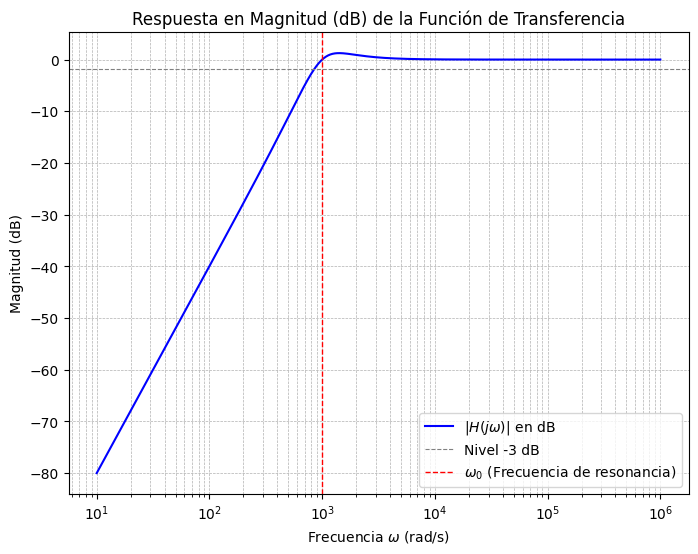

Frecuencia de resonancia (œâ‚ÇÄ): 1000.00 rad/s


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Par√°metros del circuito
R = 10      # Resistencia en ohmios
L = 0.01    # Inductancia en henrios
C = 0.0001  # Capacitancia en faradios

# Calcular la frecuencia de resonancia
w0 = np.sqrt(1 / (L * C))  # Frecuencia de resonancia (rad/s)

# Calcular el factor de calidad Q
Q = w0 * R * C  

# Definir el rango de frecuencias en rad/s
w = np.logspace(1, 6, 1000)  # De 10^1 a 10^6 rad/s

# Calcular la funci√≥n de transferencia en m√≥dulo
num = w**2  # Numerador
den = np.sqrt((w**2 - w0**2)**2 + (w * w0 / Q)**2)  # Denominador
H_w = num / den  # M√≥dulo de la funci√≥n de transferencia

# Convertir a dB
H_dB = 20 * np.log10(np.abs(H_w))

# Determinar el valor m√°ximo de la respuesta en dB
H_max_dB = max(H_dB)

# Nivel de -3 dB
H_3dB = H_max_dB - 3  

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(w, H_dB, label=r'$|H(j\omega)|$ en dB', color='b')

# L√≠nea de referencia en -3 dB
plt.axhline(y=H_3dB, color='gray', linestyle='--', linewidth=0.8, label='Nivel -3 dB')

# Marcar la frecuencia de resonancia
plt.axvline(x=w0, color='r', linestyle='--', linewidth=1, label=r'$\omega_0$ (Frecuencia de resonancia)')

# Configuraci√≥n de los ejes
plt.xscale('log')  # Escala logar√≠tmica en el eje X
plt.xlabel(r'Frecuencia $\omega$ (rad/s)')
plt.ylabel(r'Magnitud (dB)')
plt.title('Respuesta en Magnitud (dB) de la Funci√≥n de Transferencia')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Imprimir resultados clave
print(f"Frecuencia de resonancia (œâ‚ÇÄ): {w0:.2f} rad/s")


Al igual que antes, es importante recalcar, que tenemos una zona en las cual tenemos un crecimiento asindotico que obedecen una pendiente de $ \frac{\pm 40 dB}{Dec} $, ya que en este caso tenemos un cero doble en el origen. Que cuando llegamos a una atenuaci√≥n de $ -3dB $ es cuando vamos a considerar activo a este filtro, por lo que, a partir de este momento tomamos que la se√±al pasa a la salida transmitiendo toda la informacion que tenia en la entrada para esas frecuencias. En este caso esto ocurriria para $ w = 8*10^2 \frac{rad}{s} $

Ahora, al igual que antes, vamos a calcular la fase de esta transferencia utilizando la funcion analitica:

### $$ \angle H(jw) = \arg(H(jw)) = \arg(\frac{P(jw)}{Q(jw)}) = \arg(P(jw)) - \arg(Q(jw)) $$

### $$ \angle H(jw) = Arg(-w^2) - Arg(-w^2 + jw \frac{w_0}{Q} + w_0^2) =  180^\circ - \arctan( \frac{w \frac{w_0}{Q}}{w_0^2 - w^2} ) $$

Ya con esto podemos graficar la fase de este filtro:

**Disclaimer**, Esta grafico fue hecho con chat GPT


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, bode

# Definir par√°metros
w0 = 1  # Frecuencia natural
Q = 1   # Factor de calidad

# Definir la funci√≥n de transferencia
num = [1, 0, 0]  # s^2
den = [1, w0/Q, w0**2]
system = TransferFunction(num, den)

# Obtener la respuesta en frecuencia
w, mag, phase = bode(system)

# Graficar el diagrama de fase
plt.figure(figsize=(8, 5))
plt.semilogx(w, phase, label='Fase (¬∞)')
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Fase (¬∞)')
plt.title('Diagrama de fase')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

Al igual que antes, ocurre lo mismo que para bajas frecuencias el termino dominante es el del numerador y a medida que $ w \rightarrow \infty $ el termino del denominador toma mas fuerta inviertiendo la fase, aunque en este caso, como comenzamos de $180^\circ$ cuando $ w \rightarrow \infty $ la fase va a ir disminuyendo hasta tender a 0

## 3) Entonces que tipo de filtro tenemos ?

Habiendo hecho previamente el analisis de extremos, en el cual ya intuimos que el filtro se comporta como un **Pasa Altos** y a su vez, luego de haber graficado la transferencia en dB podemos confirmar que este filtro tiene un comportamiento como el de un **Pasa Altos**.

Esto debido a que para bajas frecuencias vemos que tenemos una alta atenuacion lo que impide que tengamos se√±ales a la salida con dichas frecuencias. A si mismo, vemos que hasta los $ -3dB $ el filtro sube de manera asintotica y a partir de all√≠ consideramos que el filtro deja pasar a la se√±al de entrada

---

## Bonus

üíé C√≥mo calcular√≠a la salida de cada filtro (en r√©gimen permanente) si a Vi fuera una senoidal de frecuencia arbitraria f0 ?

En este caso, estando en regimen permanente llevaria al seno al dominio de Laplace y lo multiplicar√≠a por la transferencia del mismo, ya que, como en el tiempo tendriamos una **convolucion** pero al pasar al dominio de Laplace generamos que esto se pueda tomar como una multiplicacion, lo que facilita enormemente la operacion:

$$ Si \rightarrow v_i(t) = A \sin(w t + \phi) $$

$$ \Rightarrow V_o(s) = H(s) V_i(s) $$

De esta manera, rapidamente obtenemos la se√±al a la salida del filtro y finalmente podemos realizar la antitransformada de laplace para llevar nuestra expresion del dominio de Laplace al tiempo

$$ \mathcal{L}^{-1} \left\{ V_o(s) \right\} = V_o(t) $$



ü§Ø ¬øC√≥mo se podr√≠an conectar en cascada ambos filtros y qu√© respuesta ser√≠a la resultante?

Para poder conectar 2 filtros vamos a poner en medio de ellos un **Amplificador Operacional** en configuracion seguidor o buffer, de manera que aislamos las etapas. Es decir, que de esta manera no cargamos al segundo filtro con la impedancia del primero. Esto es debido a que al operacional no ingresa corriente y tiene una impedancia infinita, por lo que, " aisla " a las 2 etapas. Por otro lado, el operacional en esa configuracion lleva la tension que tiene a la entrada a la salida. De esta manera, llevamos la se√±al filtrada de la primera etapa para luego ser trabajada en la segunda etapa. 

En este caso, tendriamos un **Pasa Banda** en cascada con un **Pasa Altos**, lo que hace que a la salida tengamos sobre todo el BW del Pasa Altos que aumenta un poco mas debido a la contribucion del Pasa altos en la segunda etapa. Podemos graficar esto:

**Disclaimer**, Esta grafico fue hecho con chat GPT


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, freqresp
from IPython.display import display, Math

# Par√°metros del filtro
w0 = 1000  # Frecuencia central (rad/s)
Q = 2  # Factor de calidad

# Mostrar ecuaciones en LaTeX
display(Math(r"H_1(s) = \frac{s \frac{\omega_0}{Q}}{s^2 + s \frac{\omega_0}{Q} + \omega_0^2}"))
display(Math(r"H_2(s) = \frac{s^2}{s^2 + s \frac{\omega_0}{Q} + \omega_0^2}"))

# Definir las funciones de transferencia
num1 = [w0/Q, 0]  # Numerador del primer filtro
den1 = [1, w0/Q, w0**2]  # Denominador del primer filtro

num2 = [1, 0, 0]  # Numerador del segundo filtro
den2 = [1, w0/Q, w0**2]  # Denominador del segundo filtro

# Crear los sistemas de transferencia
H1 = TransferFunction(num1, den1)
H2 = TransferFunction(num2, den2)

# Sistema en cascada: Multiplicaci√≥n de funciones de transferencia
num_total = np.polymul(num1, num2)
den_total = np.polymul(den1, den2)
H_total = TransferFunction(num_total, den_total)

# Frecuencia de an√°lisis (escala logar√≠tmica)
w = np.logspace(1, 5, 1000)  # Rango de 10^1 a 10^5 rad/s

# Obtener la respuesta en frecuencia (corrigiendo el error)
w, H1_resp = freqresp(H1, w)
_, H2_resp = freqresp(H2, w)
_, H_total_resp = freqresp(H_total, w)

# Convertir magnitud a dB
mag1_db = 20 * np.log10(abs(H1_resp))
mag2_db = 20 * np.log10(abs(H2_resp))
mag_total_db = 20 * np.log10(abs(H_total_resp))

# Graficar la magnitud en Jupyter
plt.figure(figsize=(8, 6))
plt.semilogx(w, mag1_db, label=r"$|H_1(j\omega)|$", linestyle="--")  # L√≠nea discontinua para H1
plt.semilogx(w, mag2_db, label=r"$|H_2(j\omega)|$", linestyle="--")  # L√≠nea discontinua para H2
plt.semilogx(w, mag_total_db, label=r"$|H_1(j\omega) \cdot H_2(j\omega)|$", linestyle="-")  # L√≠nea continua para H_total

# Personalizaci√≥n del gr√°fico
plt.xlabel("Frecuencia (rad/s)")
plt.ylabel("Magnitud (dB)")
plt.title("M√≥dulo de la Transferencia de los Filtros en Cascada")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()
